In [1100]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
from sklearn.model_selection import train_test_split
from sklearn import metrics


import seaborn as sns
'''this script test out given the exact same chain, how often do people behave exactly the same '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 




In [1101]:

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [1102]:

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']
df = df[df['sid']=='s112']


# df = df[df['stimDur'] != 0.5]
# df = df[df['stimDur'] != 0.05]
df = df[df['stimDur'] == 0.1]
# df = df[df['stimDur'] == 0.25]

/tmp/ipykernel_529267/3093361133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_529267/3093361133.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_529267/3093361133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [1103]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [1104]:
df.shape

(400, 13)

In [1105]:
count.max()

26

In [1106]:
chain_length = 8

In [1107]:
# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)


In [1108]:
chain_matrix.shape

(400, 30)

In [1109]:
dataset, dataset_resp = make_dataset(chain_length, count, chain_matrix)


In [1110]:
    x_train, x_test, y_train, y_test = train_test_split(
        dataset, dataset_resp, test_size=0.3, random_state=2024
    )

In [1111]:
# x_train_evidence = get_abs_evidence(x_train)
# x_test_evidence = get_abs_evidence(x_test)

In [1112]:
x_train_evidence = get_evidence(x_train)
x_test_evidence =  get_evidence(x_test)

In [1113]:
import numpy as np
from collections import defaultdict
def find_unique_vectors_and_indices(vectors):
    # Convert list of vectors to a numpy array
    vectors_array = np.array(vectors)
    unique_dict = defaultdict(lambda: {"indices": [], "count": 0})

    for index, vector in enumerate(vectors_array):
        vector_tuple = tuple(vector)
        unique_dict[vector_tuple]["indices"].append(index)
        unique_dict[vector_tuple]["count"] += 1

    unique_vectors = [np.array(key) for key in unique_dict.keys()]
    unique_indices = [value["indices"] for value in unique_dict.values()]
    unique_counts = [value["count"] for value in unique_dict.values()]

    # return unique_vectors, unique_indices, unique_counts

    return unique_dict, unique_vectors, unique_indices, unique_counts



In [1114]:
unique_dict, unique_vectors, unique_indices, unique_counts = find_unique_vectors_and_indices(x_train_evidence)

In [1115]:
    combined = sorted(
        zip(unique_vectors, unique_indices, unique_counts),
        key=lambda x: x[2],
        reverse=True
    )
unique_vectors_sorted, unique_indices_sorted, unique_counts_sorted = zip(*combined)

In [1116]:
len(unique_vectors_sorted)

79

In [1117]:
ind = 0

In [1118]:
len(unique_indices_sorted)

79

In [1119]:
## theoreicalyhow many should we get?
stopped = dataset_resp[np.array(unique_indices_sorted[ind])].sum()
print(stopped)

2


In [1120]:
continued = dataset_resp[np.array(unique_indices_sorted[ind])].shape
print(continued)

(4,)


In [1121]:
percentage = stopped / continued
print(percentage)

[0.5]


In [1122]:
y_train

array([ True, False,  True, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False])

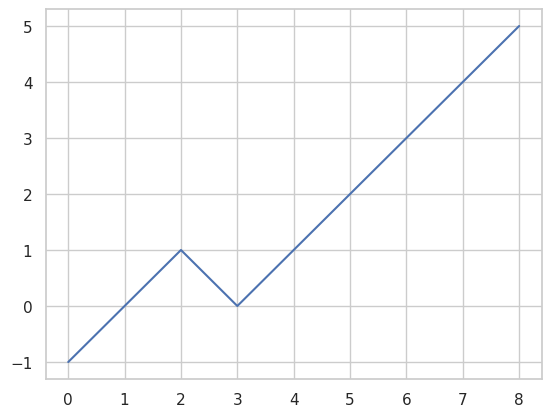

In [1128]:
plt.plot(unique_vectors_sorted[11])

0
[0.75]
1
[0.33333333]
2
[0.]
3
[0.]
4
[0.33333333]
5
[0.5]
6
[0.]
7
[0.5]
8
[0.]
9
[0.]
10
[0.]
11
[1.]
12
[0.]
13
[0.]
14
[0.5]
15
[0.]
16
[0.5]
17
[0.]
18
[0.]
19
[0.]
20
[0.]
21
[0.]
22
[0.]
23
[1.]
24
[0.]
25
[1.]
26
[0.]
27
[0.]
28
[0.]
29
[0.]


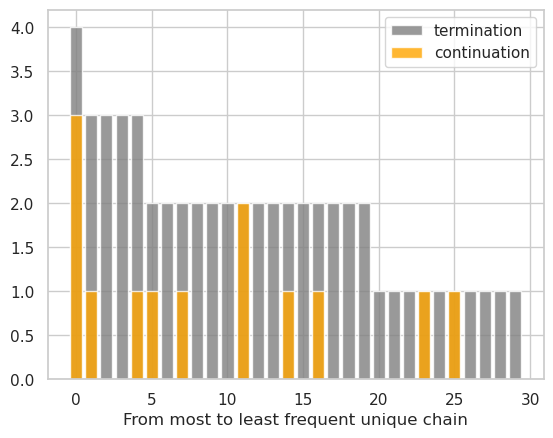

In [1124]:
end_ind = len(unique_vectors_sorted)
end_ind = 30
STOP=0
ALL=0
my_labels =['termination', 'continuation']

for ind in np.arange(0,end_ind):
    stopped = y_train[np.array(unique_indices_sorted[ind])].sum()
    all = y_train[np.array(unique_indices_sorted[ind])].shape
    percentage = stopped / all
    STOP = STOP + stopped
    ALL = ALL + all[0]
    plt.bar(ind, all, color = 'grey', alpha=0.8, label=my_labels[0])
    plt.bar(ind, stopped, color= 'orange', alpha=0.8,label=my_labels[1])

    my_labels = ['__nolabels__']*2
    plt.xlabel("From most to least frequent unique chain")
    print(ind)
    print(percentage)
plt.legend()

In [1125]:
STOP/ ALL

0.23214285714285715

In [1126]:
dataset_resp[np.array(unique_indices_sorted[0])].shape

(4,)

In [1127]:
unique_vectors_sorted[0]

array([-1.,  0., -1.,  0.,  1.,  2.,  3.,  4.,  5.])